<a href="https://colab.research.google.com/github/Purnata26/scikit/blob/master/heart_disease(kaggle_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import pandas as pd
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/raw/heart.csv',index_col=0)
data

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [67]:
from sklearn.model_selection import train_test_split
X=data.drop('target',axis='columns')
X

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2
41,0,1,130,204,0,0,172,0,1.4,2,0,2
56,1,1,120,236,0,1,178,0,0.8,2,0,2
57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3
45,1,3,110,264,0,1,132,0,1.2,1,0,3
68,1,0,144,193,1,1,141,0,3.4,1,2,3


In [68]:
y=data.target
y.shape

(303,)

In [69]:
data.isna().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [70]:
data.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


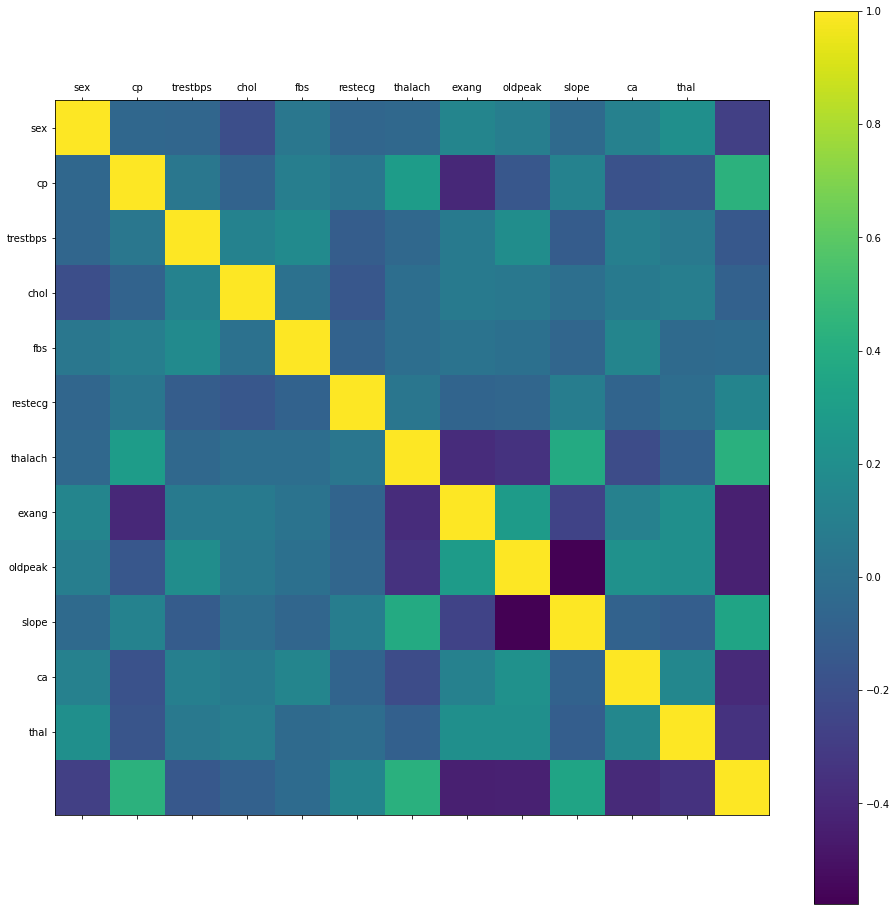

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize']=(29,20)
correlation=data.corr()

plt.matshow(correlation)
plt.xticks(np.arange(X.shape[1]),X.columns)
plt.yticks(np.arange(X.shape[1]),X.columns)
plt.colorbar()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c3c47ce10>,
      dtype=object)

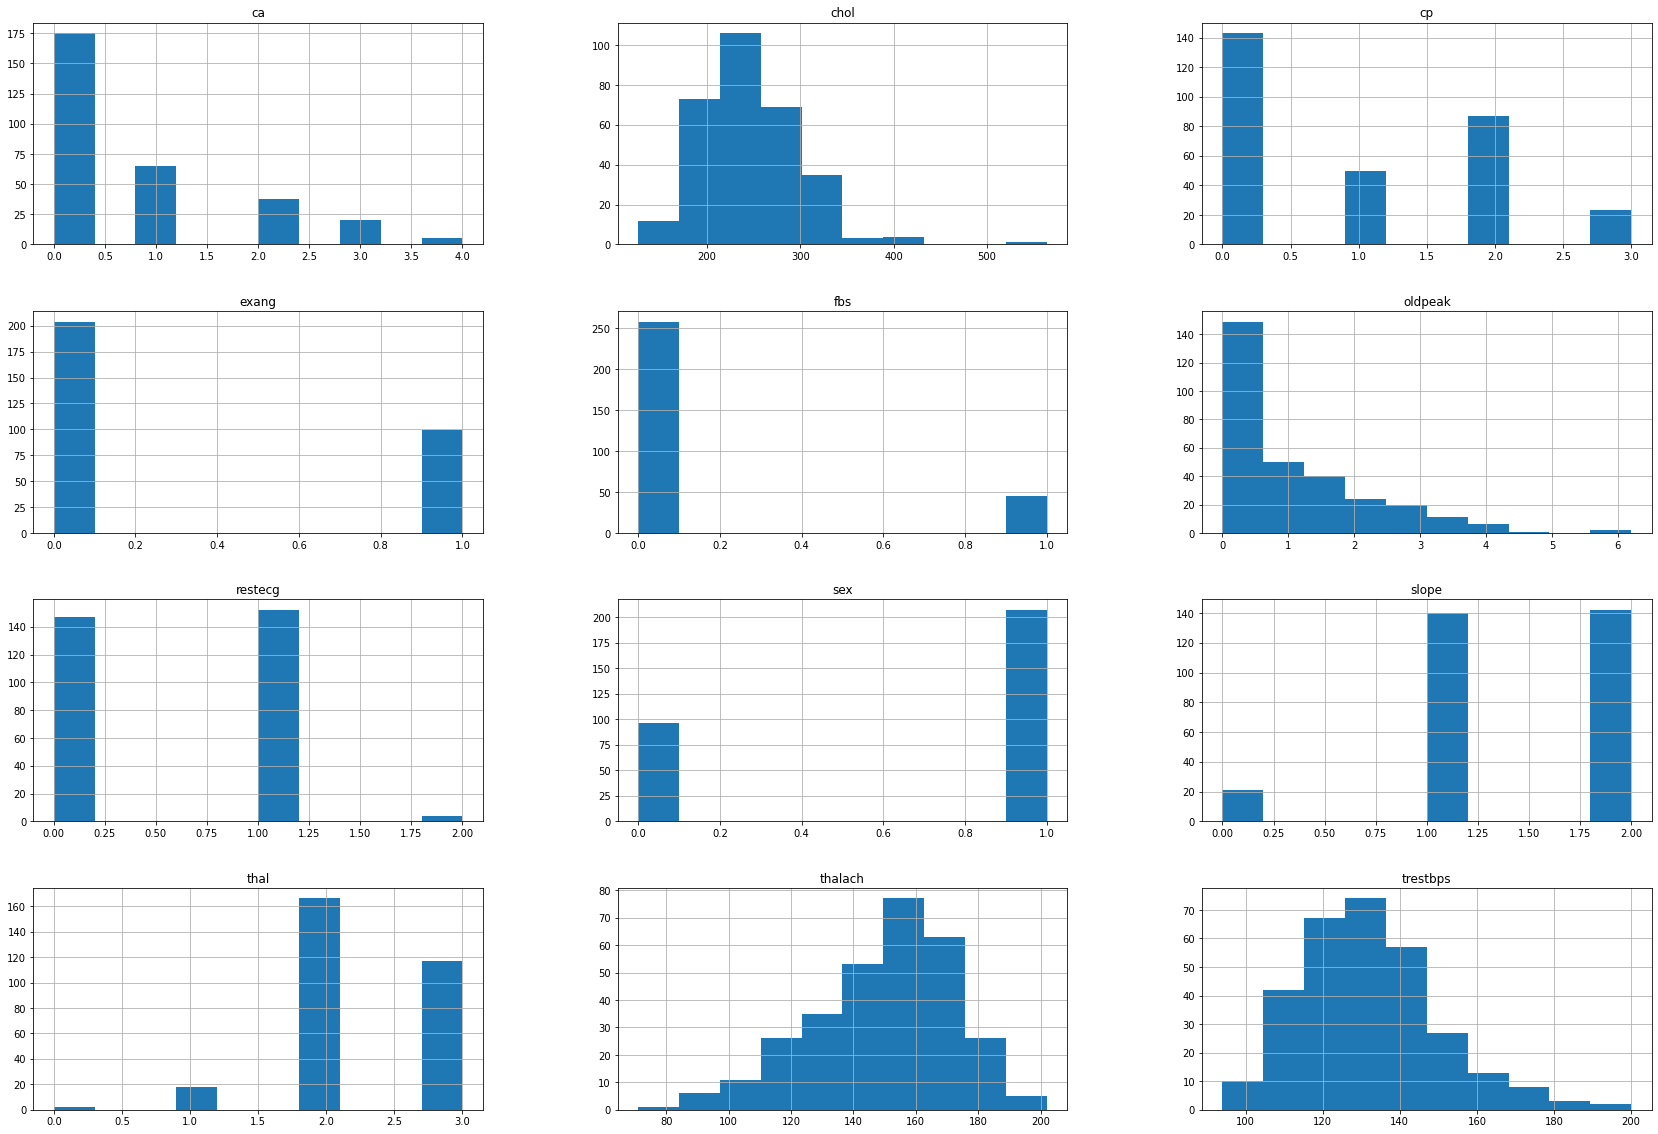

In [72]:
X.hist()

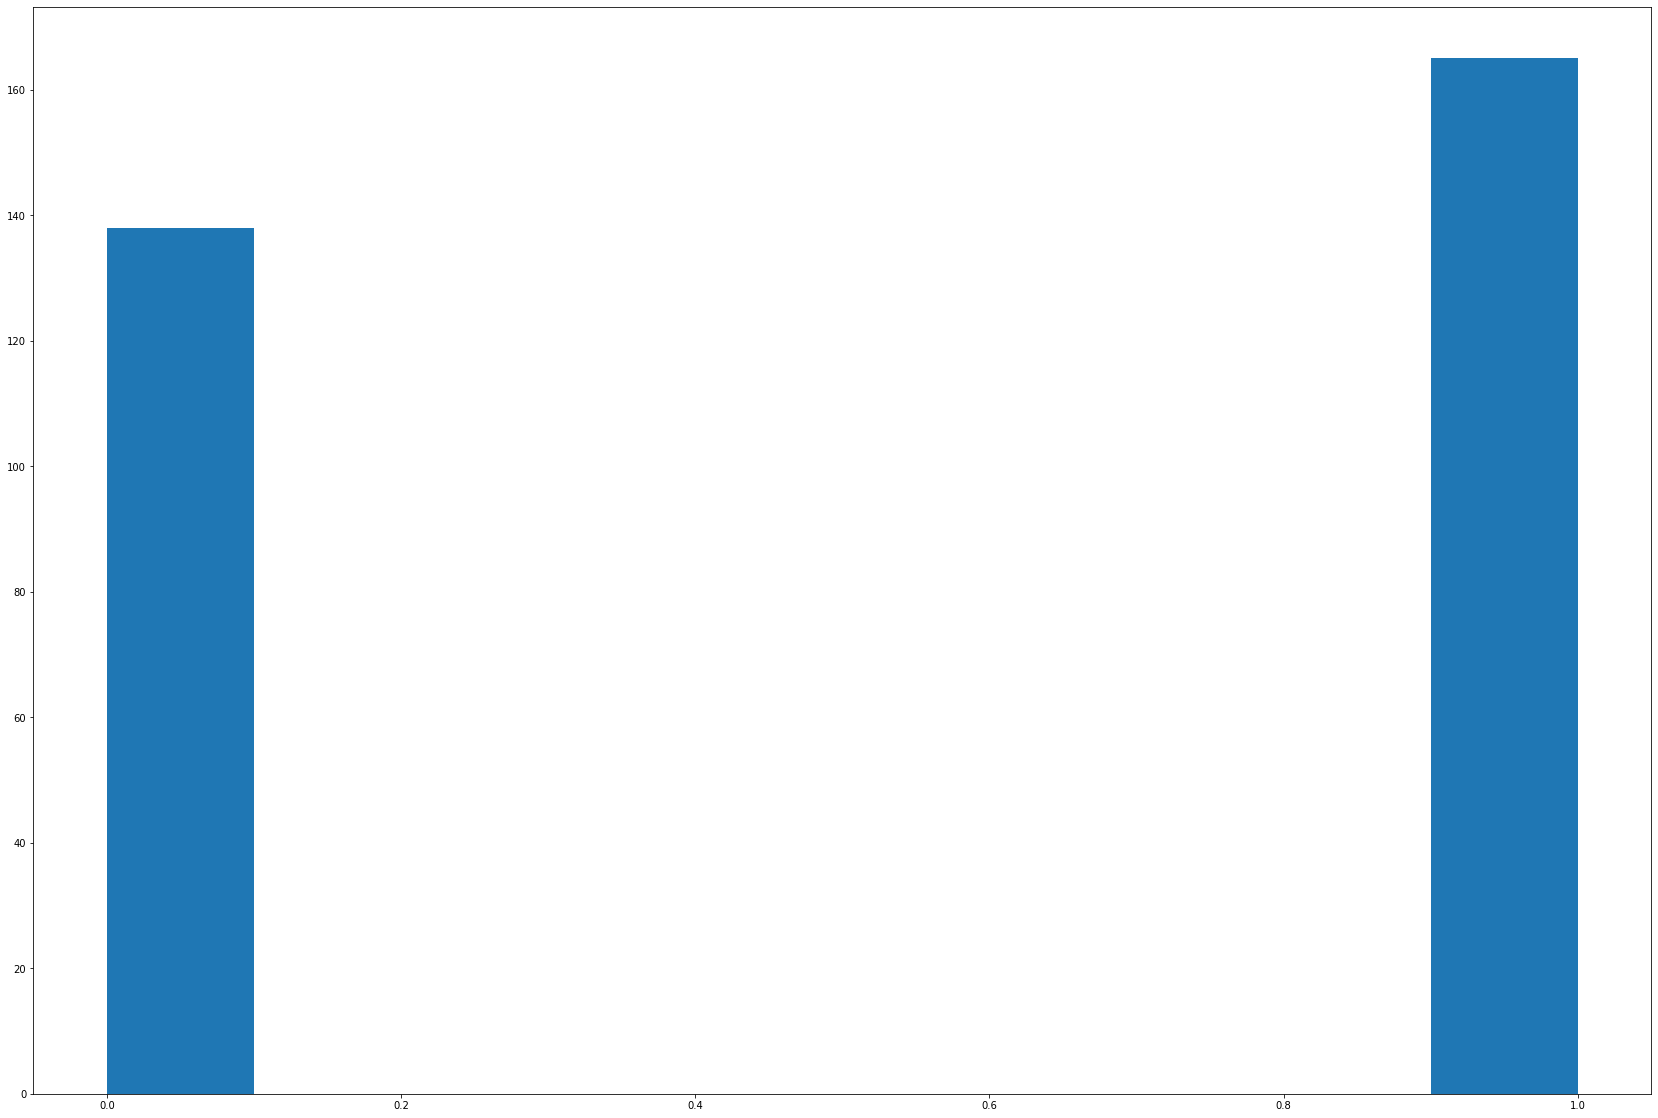

In [73]:
plt.hist(data.target)
rcParams['figure.figsize']=(8,8)

**NOW WE NEED TO SCALE THE FEATURES** 

In [74]:
from sklearn.preprocessing import StandardScaler
X = pd.get_dummies(X, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])
X

,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
age,,,,,,,,,,,,,,,,,,,,,,,,,
63,145,233,150,2.3,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0
37,130,250,187,3.5,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
41,130,204,172,1.4,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
56,120,236,178,0.8,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
57,120,354,163,0.6,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,140,241,123,0.2,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
45,110,264,132,1.2,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1
68,144,193,141,3.4,2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1


In [75]:
columns_for_scaling=['ca','chol','trestbps','thalach','oldpeak']
standard_scalar=StandardScaler()
X[columns_for_scaling]=standard_scalar.fit_transform(X[columns_for_scaling])

In [76]:
X

,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
age,,,,,,,,,,,,,,,,,,,,,,,,,
63,0.763956,-0.256334,0.015443,1.087338,-0.714429,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0
37,-0.092738,0.072199,1.633471,2.122573,-0.714429,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
41,-0.092738,-0.816773,0.977514,0.310912,-0.714429,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
56,-0.663867,-0.198357,1.239897,-0.206705,-0.714429,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
57,-0.663867,2.082050,0.583939,-0.379244,-0.714429,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.478391,-0.101730,-1.165281,-0.724323,-0.714429,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
45,-1.234996,0.342756,-0.771706,0.138373,-0.714429,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1
68,0.706843,-1.029353,-0.378132,2.036303,1.244593,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1


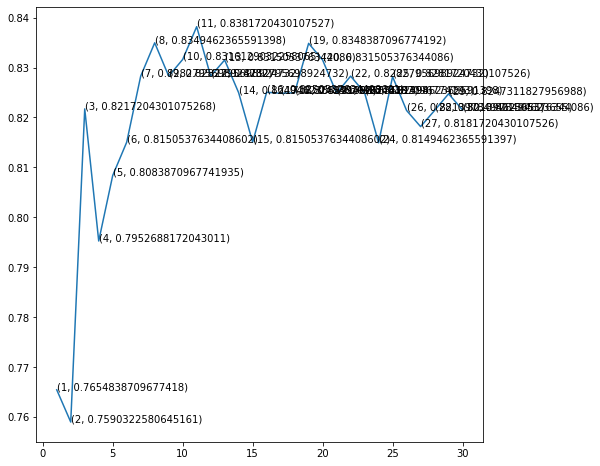

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
k_value=list()
k_range=np.arange(1,31)
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  cross=cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()
  k_value.append(cross)
plt.plot(k_range,k_value)
for k in k_range:
    plt.text(k, k_value[k-1], (k, k_value[k-1]))

max cross_val_score for knn for k=11

In [78]:
from sklearn.svm import SVC
svc_score=[]
kernels=['linear','poly','rbf','sigmoid']
for i in range(len(kernels)):
  svc_class=SVC(kernel=kernels[i])
  cross=cross_val_score(svc_class,X,y,cv=10,scoring='accuracy').mean()
  svc_score.append(cross)

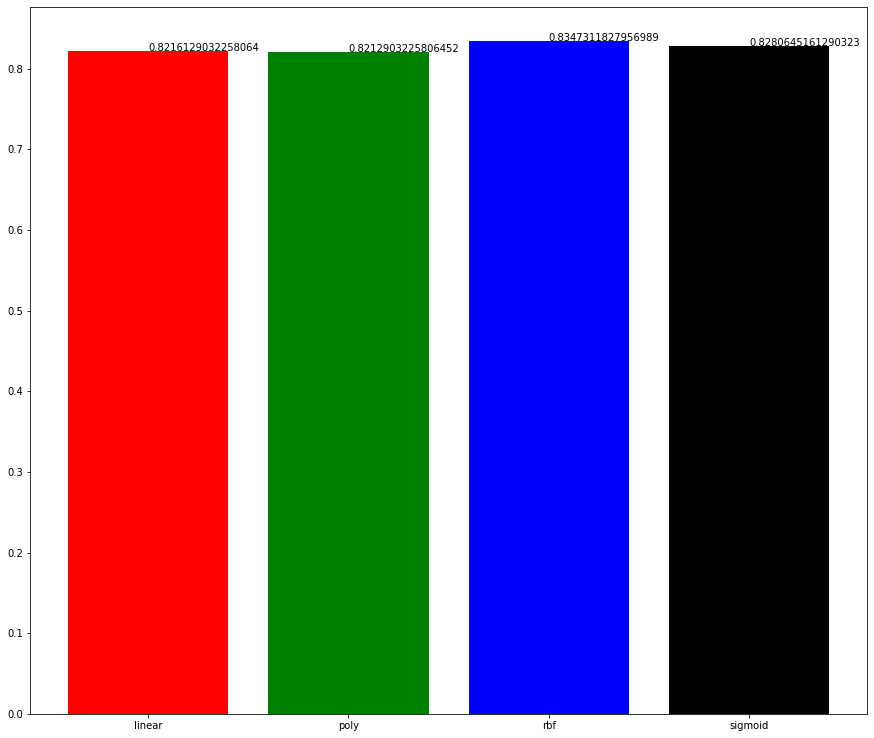

In [79]:
rcParams['figure.figsize']=(15,13)
plt.bar(kernels,svc_score,color=['red','green','blue','black'])
for i in range(len(svc_score)):
  plt.text(i,svc_score[i],svc_score[i])


In [80]:
knn=KNeighborsClassifier(n_neighbors=11)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)
print(X_train.shape)
print(X_test.shape)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)


(227, 25)
(76, 25)


In [81]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[34,  4],
       [ 4, 34]])